# __Why Housing Market?__

-Provide a better understanding of the housing market in a specific city based off of Craigslist

-Interested because we are graduating seniors, and it would be beneficial to understand the housing market since we are probably going to move

-We decided to focus around Sacramento since that is where we are trying to find a job and move to, so learning about the market would be beneficial

# __Main Questions__

-What features are the best to chose to predict price?

-How to predict location based on the given variables?

# __Sub Questions__

-Is size and price correlated?

-How much is the difference of price per square feet depending on the zone?

-What are the words most used on these listing?

# __Getting Data via webscraping__

In [1216]:
import requests
import requests_cache
import lxml
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
requests_cache.install_cache('coll_cache')
%matplotlib inline


def functtion1(url):
    '''
    Get urls
    '''
    article = requests.get(url)
    articleT = article.text
    articleB = BeautifulSoup(articleT,'html.parser')

    new=articleB.find_all(name="a", attrs={'class':"result-title hdrlnk"})

    new

    lista=[]
    for a in new:
        lista.append(a.attrs["href"])
    
    return lista

In [1217]:
def function2(url):
    '''
    Parse url to get information
    '''
    article = requests.get(url)
    articleT = article.text
    articleB = BeautifulSoup(articleT,'html.parser')
## add more 
    adict = {'price':[],'housing':[],'title':[],'reference':[],'timeposted':[],'data-latitude':[],'data-longitude':[],'characteristics':[]}

    a=articleB.find_all(name="span", attrs={'class':"price"})
    try:
        a=a[0].text
    except IndexError:
        pass
    try:
        adict["price"].append(a)
    except AttributeError:
        pass

    ########################
    b=articleB.find_all(name="span", attrs={'class':"housing"})
    try:
        b=b[0].text
    except IndexError:
        pass
    
    try:
        adict["housing"].append(b)
    except AttributeError:
        pass

    ########################
    c=articleB.find_all(name="span", attrs={'id':"titletextonly"})
    try:
        c=c[0].text
    except IndexError:
        pass

    try:
        adict["title"].append(c)
    except AttributeError:
        pass
            
    ########################
    d=articleB.find_all(name="small")
    try:
        d=d[0].text
    except IndexError:
        pass

    try:
        adict['reference'].append(d)
    except AttributeError:
        pass
    ############################
    e=articleB.find_all(name="time", attrs={'class':"date timeago"})
    try:
        e=e[0].text
    except IndexError:
        pass

    try:
        adict['timeposted'].append(e)
    except AttributeError:
        pass
    
    ############################\date timeago
    f=articleB.find_all(name="div", attrs={'id':"map"})
    try:
        f=f[0]["data-longitude"]
    except IndexError:
        pass
    
    try:
        adict['data-longitude'].append(f)
    except AttributeError:
        pass

    ############################\date timeago
    g=articleB.find_all(name="div", attrs={'id':"map"})

    try:
        g=g[0]["data-latitude"]
    except IndexError:
        pass

    try:
        adict['data-latitude'].append(g)
    except AttributeError:
        pass
    
    ############################\date timeago
    h=articleB.find_all(name="span", attrs={'class':"shared-line-bubble"})
    
    listh=[]
    
    try:
        for i in h:
            listh.append(i.text)
        
    except IndexError:
        pass
    
    try:
        adict['characteristics'].append(listh)
    except AttributeError:
        pass

    return adict

In [549]:
finalessss=[]
for i in functtion1("https://sacramento.craigslist.org/search/apa"):
    finalessss.append(function2(i))
    
for i in functtion1("https://sacramento.craigslist.org/search/apa"+"?s=120"):
    finalessss.append(function2(i))
    
for i in functtion1("https://sacramento.craigslist.org/search/apa"+"?s=240"):
    finalessss.append(function2(i))

for i in functtion1("https://sacramento.craigslist.org/search/apa"+"?s=360"):
    finalessss.append(function2(i))
    
finalessss=pd.DataFrame(finalessss)

In [1260]:
#for getting the room
finalessss["room"]=0
finalessss["size(ft2)"]=0
finalessss["availability"]=0

wordlist = []
roomlist=[]#write them ouside forr lop so they dont become 0

for i in finalessss["characteristics"]:
    a=i[0]

    letters = set('/')

    for word in a:
        if letters & set(word):
            wordlist=word
            
    roomlist.append(wordlist)
    
finalessss["room"]=roomlist

################
wordlist1 = []
roomlist1=[]
for i in finalessss["characteristics"]:
    a=i[0]
  
    matching = [word1 for word1 in a if "ft" in word1]
     
    roomlist1.append(matching)
    
finalessss["size(ft2)"]=roomlist1

##############
wordlist1 = []
roomlist1=[]
for i in finalessss["characteristics"]:
    a=i[0]
  
    matching = [word1 for word1 in a if "available" in word1]
     
    roomlist1.append(matching)
    
finalessss["availability"]=roomlist1

listings = finalessss.copy()

In [1261]:
"""unclean data"""
listings.head()

,characteristics,data-latitude,data-longitude,housing,price,reference,timeposted,title,room,size(ft2),availability
0,"[[2BR / 1Ba, 1000ft2, available mar 10]]",[38.628400],[-121.328700],[/ 2br - 1000ft2 - ],[$1175],[ (Carmichael)],[\n 2018-03-05 10:49am\n ...,"[New fourplex: 2 br/1ba, granite kitchen]",2BR / 1Ba,[1000ft2],[available mar 10]
1,"[[1BR / 1Ba, 650ft2, available mar 7]]",[38.581977],[-121.477604],[/ 1br - 650ft2 - ],[$725],"[ (Sacramento, CA)]",[\n 2018-03-08 6:12pm\n ...,"[Recently Updated One Bedroom, One Bathroom Ho...",1BR / 1Ba,[650ft2],[available mar 7]
2,"[[2BR / 2Ba, 910ft2, available mar 8]]",[37.994057],[-122.123933],[/ 2br - 910ft2 - ],[$1975],[ (Martinez)],[\n 2018-03-08 6:32pm\n ...,[Your new home for the new is waiting for you ...,2BR / 2Ba,[910ft2],[available mar 8]
3,"[[3BR / 2Ba, 1660ft2, available feb 26]]",[38.496200],[-121.529700],[/ 3br - 1660ft2 - ],[$1750],[ (Sacramento)],[\n 2018-02-26 11:46am\n ...,"[Nice House, Panoramic View, Castro]",3BR / 2Ba,[1660ft2],[available feb 26]
4,[[available jan 16]],[41.212400],[-122.273400],[[]],[$360],"[ (Dunsmuir, Cal)]",[\n 2018-02-22 4:51pm\n ...,[Rustic Trailer Park],3BR / 2Ba,[],[available jan 16]


# __Cleaning the Data__

Converting the column variables into strings for the whole column. We do this for each column and convert to numeric variable if needed:

In [1262]:
# converting list into strings
cleanlat = listings['data-latitude'].str[0]
cleanlon = listings['data-longitude'].str[0]

price = listings['price'].str[0]
cleanprice = []
for i in price:
    try:
        clean = i.replace("$", "")
        cleanprice.append(clean)
    except AttributeError:
        cleanprice.append("NaN")

#need to make price numeric
newcleanprice = []
for i in cleanlistings['price']:
    try:
        newcleanprice.append(pd.to_numeric(i))
    except ValueError:
        newcleanprice.append("NaN")

ref = listings['reference'].str[0]
cleanref = []
for i in ref:
    try:
        clean = i.replace("\n", "").replace("(", "").replace(")","").replace("        ","")
        cleanref.append(clean)
    except AttributeError:
        cleanref.append("NaN")

time = listings['timeposted'].str[0]
cleantime = []
for t in time:
    try:
        clean = t.replace("\n", "").replace("                    ","").replace("                ","")
        cleantime.append(clean)
    except AttributeError:
        cleantime.append("NaN")

cleantitle = listings['title'].str[0]

size = listings['size(ft2)'].str[0]

cleansize = []
for s in size:
    try:
        clean = s.replace("ft2", "")
        cleansize.append(clean)
    except AttributeError:
        cleansize.append("NaN")

#need to make size numeric
newcleansize = []
for i in cleanlistings['size(ft2)']:
    try:
        newcleansize.append(pd.to_numeric(i))
    except ValueError:
        newcleansize.append("NaN")

cleanavail = listings['availability'].str[0]

Change the old data into the cleaned data:



In [1263]:
listings['data-latitude'] = pd.to_numeric(cleanlat)
listings['data-longitude'] = pd.to_numeric(cleanlon)
listings['price'] = newcleanprice
listings['reference'] = cleanref
listings['timeposted'] = cleantime
listings['title'] = cleantitle
listings['size(ft2)'] = newcleansize
listings['availability'] = cleanavail
cleanlistings = listings.drop(columns=['characteristics', 'housing'])

Drop NaN's from the data set:

In [1264]:
import numpy as np 
convertNaN= cleanlistings.replace("NaN",np.nan, regex=True)
finalcleanlistings = convertNaN.dropna(axis = 0, how= 'any')
finalcleanlistings.columns = ['lat', 'lon', 'price', 'reference', 'timeposted', 'title', 'room', 'size(ft2)', 'availability']

Split the room colum into bedroom and bathroom to do further analysis:

In [1265]:
finalcleanlistings.loc[:,'Bedroom'], finalcleanlistings.loc[:,'Bathroom'] = finalcleanlistings.loc[:,'room'].str.split('/', 1).str

finalcleanlistings.loc[:,'Bedroom'] = finalcleanlistings.loc[:,'Bedroom'].str[:-3]
finalcleanlistings.loc[:,'Bathroom'] = finalcleanlistings.loc[:,'Bathroom'].str[:-2]
#finalcleanlistings[['Bedroom','Bathroom']] = finalcleanlistings[['Bedroom','Bathroom']].apply(pd.to_numeric)

finalcleanlistings['Bedroom'] = finalcleanlistings['Bedroom'].astype(int)
finalcleanlistings['Bathroom'] = finalcleanlistings['Bathroom'].apply(pd.to_numeric)
finalcleanlistings['Bathroom'] = finalcleanlistings['Bathroom'].astype(int)

finalcleanlistings = finalcleanlistings.drop(columns=['room'])
finalcleanlistings = finalcleanlistings[finalcleanlistings.Bedroom != 0] # get rid of rows that have 0 bedrooms
finalcleanlistings = finalcleanlistings[finalcleanlistings.price > 533] # get rid of the prices that are irrelevant
finalcleanlistings.head()

,lat,lon,price,reference,timeposted,title,size(ft2),availability,Bedroom,Bathroom
0,38.628400,-121.328700,1175.0,Carmichael,2018-03-05 10:49am,"New fourplex: 2 br/1ba, granite kitchen",1000.0,available mar 10,2,1
1,38.581977,-121.477604,725.0,"Sacramento, CA",2018-03-08 6:12pm,"Recently Updated One Bedroom, One Bathroom Hom...",650.0,available mar 7,1,1
2,37.994057,-122.123933,1975.0,Martinez,2018-03-08 6:32pm,Your new home for the new is waiting for you h...,910.0,available mar 8,2,2
3,38.496200,-121.529700,1750.0,Sacramento,2018-02-26 11:46am,"Nice House, Panoramic View, Castro",1660.0,available feb 26,3,2
5,38.686500,-121.349400,1283.0,google map,2018-03-02 4:52pm,"Build Your Credit with RentPlus, Fitness Cente...",801.0,available mar 2,2,2


# __Analysis & Plots__

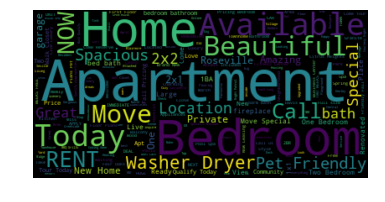

In [1224]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(finalcleanlistings['title']))
wordcloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

__What are the words most used on these listing?:__ This word cloud gives us a broad view of what is popular in the listings. For example, we chose to find out what word occurs on the title of the listing. It seems that in Craigslist, when you are searching for housing, most listings have the words: Apartment, Bedroom, Home, Available.

In [1225]:
RMSE(['size(ft2)', 'Bathroom'])

(267.33246060061947,
 [('size(ft2)', 0.69416881565335153), ('Bathroom', 158.69789891363467)])

__Maps__

In [1226]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

import geopandas as gpd         
import osmnx as ox              
import shapely.geometry as geom 

In [1227]:
lnglat = [geom.Point(x) for x in zip(finalcleanlistings.lon, finalcleanlistings.lat)]
finalcleanlistings = gpd.GeoDataFrame(finalcleanlistings, geometry = lnglat)

In [1228]:
""" https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html --> link for shapefile
"""
counties = gpd.read_file("/Users/arthurwu/Downloads/cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]

In [1229]:
# Get Sacramento and surrounding counties.
keep = ["Yolo", "Sutter", "Placer", "El Dorado", "Sacramento", "Solano", "San Joaquin", "Amador"]
sac = cali[cali.NAME.isin(keep)]

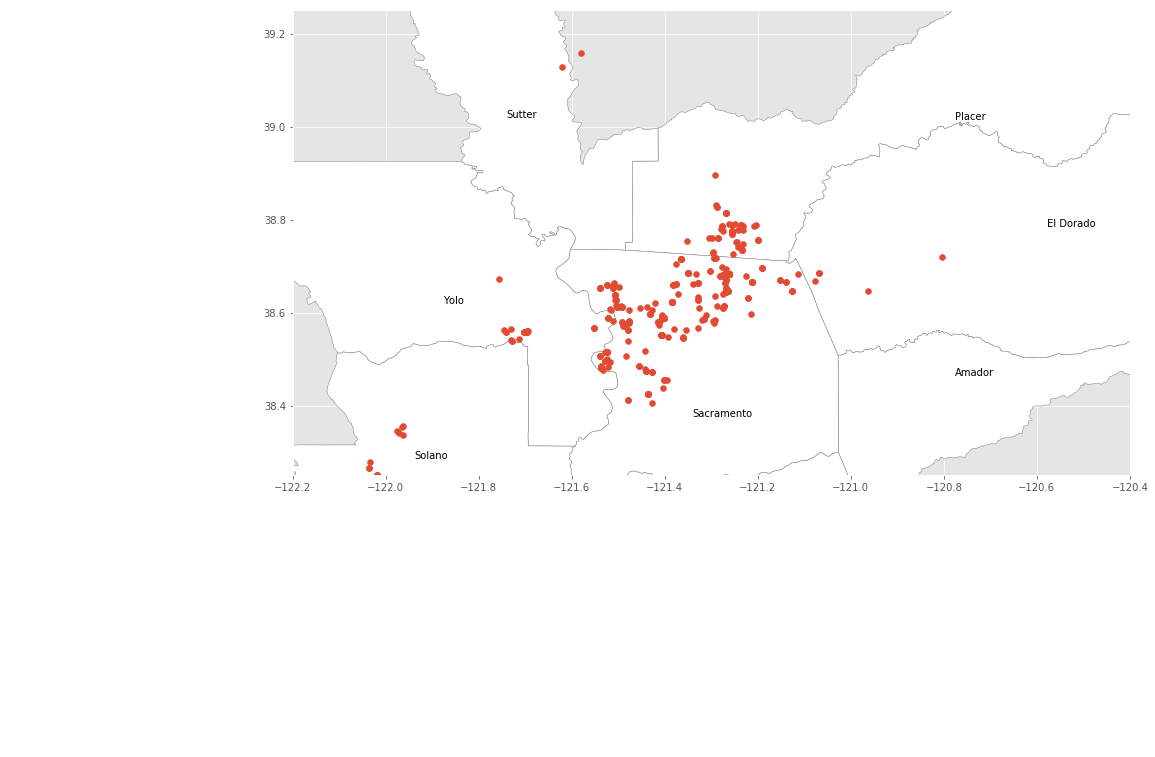

In [1230]:
ax = sac.plot(figsize = (15,15), color = "white", edgecolor = "gray")
finalcleanlistings.plot(ax = ax)

ax.set_xlim([-122.2, -120.4])
ax.set_ylim([38.25, 39.25])

# Given a row, this function gets a point and plots the county name at that point.
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.NAME, xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
sac.apply(add_label, axis = 1)

plt.show()

This gives us the streets of the counties we choose so we can plot onto the map

In [1175]:
sac_streets = ox.graph_from_place("Sacramento County, California", network_type = "drive")
#ox.plot_graph(sac_streets)

placer_streets = ox.graph_from_place("Placer , California", network_type = "drive")
#ox.plot_graph(placer_streets)

eldorado_streets = ox.graph_from_place("El Dorado Hills, California", network_type = "drive")
#ox.plot_graph(eldorado_streets)

In [1176]:
nodes, edges = ox.graph_to_gdfs(sac_streets)
nodes1, edges1 = ox.graph_to_gdfs(placer_streets)
nodes2, edges2 = ox.graph_to_gdfs(eldorado_streets)

We separate the data into five surrounding areas to compare the features between them and conduct statistical analysis on these groups. Also, by doing this we can make sense of latitude and longitude since these factors by themself do not contribute to our anaysis.

In [1231]:
#first drop na
asd=finalcleanlistings.dropna(axis=0,subset=["lat"])
asd=asd.dropna(axis=0,subset=["lon"])

#separate into groups
downtown=asd.loc[(asd['lat'] > 38.562864) & (asd['lat'] < 38.585478) & (asd['lon'] >-121.55) & (asd['lon']<-121.45)]
southnatomas=asd.loc[(asd['lat'] >  38.585478) & (asd['lat'] < 38.7) & (asd['lon'] >-121.6) & (asd['lon']<-121.45)]
ardenarcade=asd.loc[(asd['lat'] >  38.55) & (asd['lat'] < 38.6) & (asd['lon'] >-121.42) & (asd['lon']<-121.39)]
roseville=asd.loc[(asd['lat'] >  38.7) & (asd['lat'] < 38.85) & (asd['lon'] >-121.3) & (asd['lon']<-121.2)]
citrusheights_folsom=asd.loc[(asd['lat'] <  38.7) & (asd['lat'] > 38.6) & (asd['lon'] >-121.4) & (asd['lon']<-121.1)]

In [1232]:
downtown.loc[:,"location"]=1
southnatomas.loc[:,"location"]=2
ardenarcade.loc[:,"location"]=3
roseville.loc[:,"location"]=4
citrusheights_folsom.loc[:,"location"]=5

all_city = pd.concat([downtown,southnatomas,ardenarcade,roseville,citrusheights_folsom])

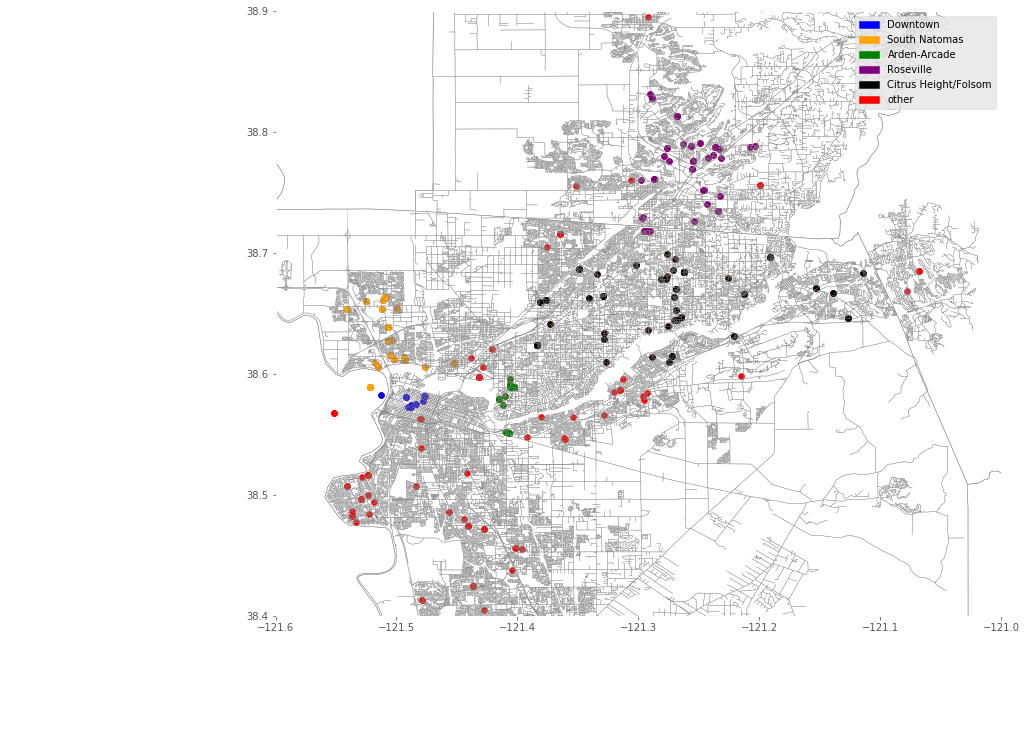

In [1233]:
import matplotlib.patches as mpatches

ax = sac.plot(figsize = (13,13), color = "white", edgecolor = "gray")
ax.set_xlim([-121.6, -121])
ax.set_ylim([38.4, 38.9])

finalcleanlistings.plot(ax = ax, color = 'red')

edges.plot(ax=ax , color = "gray", linewidth = 0.3)
edges1.plot(ax=ax , color = "gray", linewidth = 0.3)
edges2.plot(ax=ax , color = "gray", linewidth = 0.3)

downtown.plot(ax = ax, color = 'blue')
southnatomas.plot(ax = ax, color = 'orange')
ardenarcade.plot(ax = ax, color = 'green')
roseville.plot(ax = ax, color = 'purple')
citrusheights_folsom.plot(ax=ax, color = 'black')

blue_patch = mpatches.Patch(color='blue', label='Downtown')
orange_patch = mpatches.Patch(color='orange', label='South Natomas')
green_patch = mpatches.Patch(color='green', label='Arden-Arcade')
purp_patch = mpatches.Patch(color='purple', label='Roseville')
black_patch = mpatches.Patch(color='black', label='Citrus Height/Folsom')
red_patch = mpatches.Patch(color='red', label='other')

plt.legend(handles=[blue_patch,orange_patch,green_patch,purp_patch,black_patch,red_patch])

sac.apply(add_label, axis = 1)

plt.show()

Calculating median price:



In [1234]:
dtmedprice = downtown['price'].median()
rosemedprice = roseville['price'].median()
arcmedprice = ardenarcade['price'].median()
snmedprice = southnatomas['price'].median()
citrusprice = citrusheights_folsom['price'].median()
generalmedprice = finalcleanlistings['price'].median()

medPrice = {'Area': ['Downtown', 'Roseville', 'Arden-Arcade', 'South Natomas', "Citrus-Height/Folsom","Overall Listings"],'Price': [dtmedprice, rosemedprice,arcmedprice,snmedprice,citrusprice,generalmedprice]}
PriceDF = pd.DataFrame(data=medPrice)

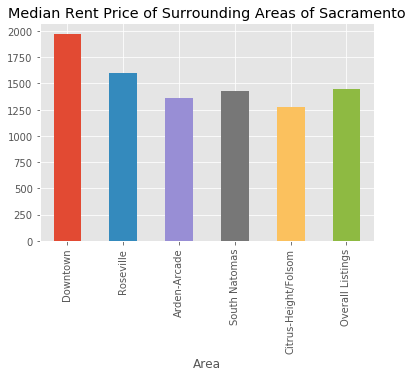

In [1235]:
PriceDF.plot(kind = 'bar', x = 'Area', y = 'Price',title = 'Median Rent Price of Surrounding Areas of Sacramento' ,legend = False)

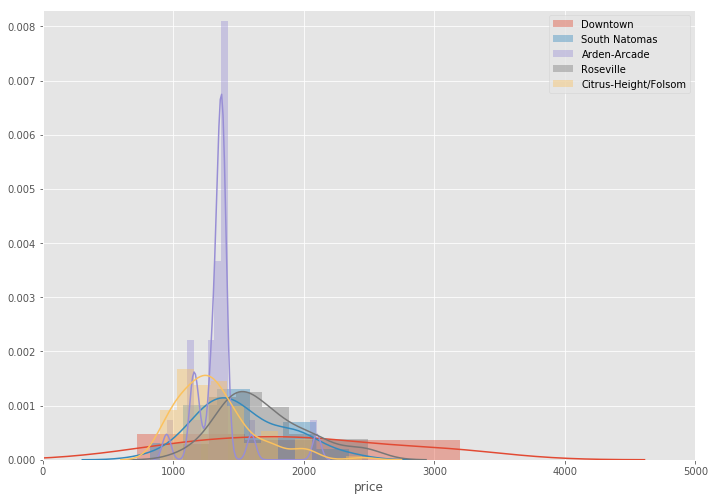

In [1236]:
import seaborn as sns
fig,ax= plt.subplots()
fig.set_size_inches(11.7,8.27)

ax.set_ylim([0, 0.0083])
ax.set_xlim([0, 5000])

sns.distplot(downtown['price'], label = 'Downtown')
sns.distplot(southnatomas['price'], label = 'South Natomas')
sns.distplot(ardenarcade['price'], label = 'Arden-Arcade')
sns.distplot(roseville['price'], label = 'Roseville')
sns.distplot(citrusheights_folsom['price'], label = 'Citrus-Height/Folsom')
plt.legend()
plt.show()

This plot shows the distribution of price depending on the location. We see that Arden-Arcade has high and narrow peaks, where as South Natomas, Roseville, and Citrus Heights/Folsom are modereatly peaked. And Downtown has a flat-top distribution.

Calculating median size:



In [1237]:
dtmedsize = downtown['size(ft2)'].median()
rosemedsize = roseville['size(ft2)'].median()
arcmedsize = ardenarcade['size(ft2)'].median()
snmedsize = southnatomas['size(ft2)'].median()
citrussize = citrusheights_folsom['size(ft2)'].median()
generalmedsize = finalcleanlistings['size(ft2)'].median()

medSize = {'Area': ['Downtown', 'Roseville', 'Arden-Arcade', 'South Natomas','Citrus-Height/Folsom',"Overall Listings"],'Size(ft2)': [dtmedsize, rosemedsize,arcmedsize,snmedsize,citrussize,generalmedsize]}
SizeDF= pd.DataFrame(data=medSize)

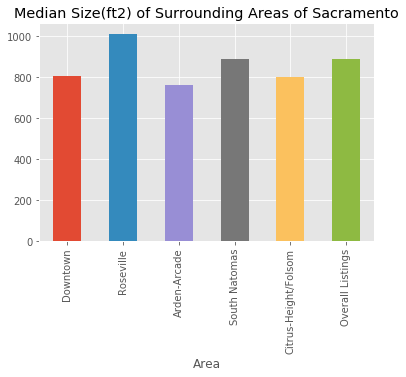

In [1238]:
SizeDF.plot(kind = 'bar', x = 'Area', y = 'Size(ft2)',title = 'Median Size(ft2) of Surrounding Areas of Sacramento' ,legend = False)

__How much is the difference of price per square feet depending on the zone?__

In [1239]:
PPft2DF = pd.merge(PriceDF,SizeDF)
PPft2DF['PricePerft2($)'] = PPft2DF['Size(ft2)'] / PPft2DF['Price']
PPft2DF

,Area,Price,Size(ft2),PricePerft2($)
0,Downtown,1974.0,806.0,0.408308
1,Roseville,1599.0,1012.0,0.632896
2,Arden-Arcade,1362.5,760.0,0.557798
3,South Natomas,1428.0,890.0,0.623249
4,Citrus-Height/Folsom,1275.0,802.0,0.629020
5,Overall Listings,1445.0,890.0,0.615917


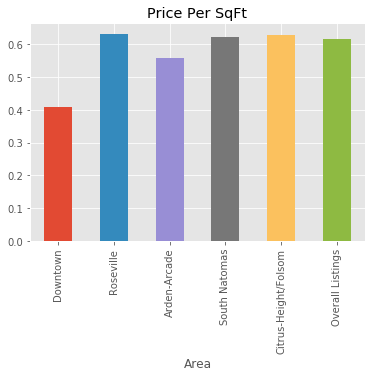

In [1240]:
PPft2DF.plot(kind = 'bar', x = 'Area', y = 'PricePerft2($)',title = 'Price Per SqFt' ,legend = False)

# Machine Learning

__What features are the best to chose to predict price?__ We use linear regresion to answer this question

__OLS Simple Regression__

In [1241]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

sizeprice = pd.DataFrame({"Price": all_city['price'], 'Size': all_city['size(ft2)']})

Check for correlations:

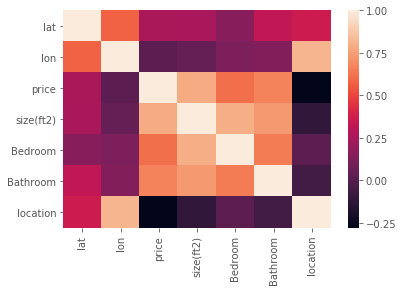

In [1242]:
corr = all_city.corr()
sns.heatmap(corr, xticklabels = corr.columns.values ,yticklabels = corr.columns.values)

We see that price and size are highly correlated, which is beneficial since we are predicting one onto the other. (When dealing with more explanatory variables in multivariable regression), size is the best single explanatory variable against price, our repsonse variable. Since we are only dealing with one predictor variable, multicollinearity is not a problem yet.

In [1243]:
result = sm.ols(formula = "Price ~ Size", data = sizeprice).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     363.7
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           6.87e-49
Time:                        05:50:46   Log-Likelihood:                -1561.1
No. Observations:                 227   AIC:                             3126.
Df Residuals:                     225   BIC:                             3133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    604.9032     47.846     12.643      0.0

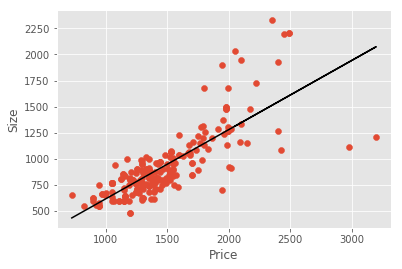

In [1244]:
X = sizeprice['Price'].values[:,np.newaxis]
y = sizeprice['Size'].values
model2 = LinearRegression()
model2.fit(X,y)
plt.scatter(X, y)
plt.plot(X, model2.predict(X),color='k')
plt.xlabel('Price')
plt.ylabel('Size')
plt.show()

__Is size and price correlated?__
This scatter plot shows us that price and size have a positive correlation. Price increases by 0.93 when size increases by 1.

__Multiple Linear Regression__

We will try multiple linear regresion without separating into a test and train set, which allows us to properly test if our model is right since we are not going to divide the data set, however we will divide our data into a training and test set after. (Same reasoning for logistic regression models).

We use multiple linear regresion to get the price prediction based on our training and test data set.

In [1245]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import train_test_split 


def RMSE(features):
    
    '''rmse formula and gets the avrg of the rmse of cross validation, argument takes in the features used for 
    the multiple linear regresion.Also, outputs the coeficient for feature'''
    
    X = all_city[features]
    X.head()
    y = all_city['price']
    
    #separating into train and test
    X_train , X_test, y_train, y_test = train_test_split(X,y, random_state = 1, train_size = 0.8) 
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),list(zip(features, linreg.coef_))) 

Now that we have the RMSE formula we will use cross validation to determine  which features are the most appropiate to use.

In [1246]:
#example of output of formula
RMSE(['size(ft2)' , 'Bedroom', 'Bathroom','location'])

(261.59480428160344,
 [('size(ft2)', 0.66277030798265402),
  ('Bedroom', -3.7743349587331858),
  ('Bathroom', 168.49555572326565),
  ('location', -64.271979536948052)])

__Cross Validation to determine best factors__

In [1247]:
from sklearn.cross_validation import cross_val_score

def cvv(a):
    X = all_city[a]
    y = all_city.price
    lm = LinearRegression()
    return np.sqrt(-cross_val_score(lm, X, y, cv = 10, scoring = 'neg_mean_squared_error')).mean() # Avg RMSE for Cross Validation

#['size(ft2)','location','Bedroom','Bathroom']
print(cvv(['size(ft2)','location','Bedroom','Bathroom']),
cvv(['size(ft2)','location','Bedroom']),
cvv(['size(ft2)','location','Bathroom']),
cvv(['size(ft2)','Bedroom','Bathroom']),
cvv(['location','Bedroom','Bathroom']),
cvv(['size(ft2)','location']),
cvv(['size(ft2)','Bedroom']),
cvv(['location','Bedroom']),
cvv(['size(ft2)','Bathroom']),
cvv(['location','Bathroom']),
cvv(['Bedroom','Bathroom']),
cvv(['size(ft2)']),
cvv(['location']),
cvv(['Bathroom']),
cvv(['Bedroom']))

211.369433459 221.642770727 209.752625254 212.747506233 242.771154948 220.283777241 220.34025966 278.763235764 209.018704063 260.229114092 249.222651684 217.174459119 362.200487586 268.727383532 283.287003326


We can see that the minimum value is when the features is size and bathrom, so size and bathroom are the best estimators.

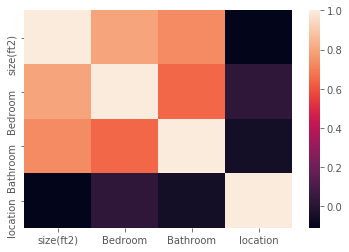

In [1248]:
import seaborn as sns
#remove columns that we wont be using for regresion
noprice = all_city.drop(columns=['price','lat','lon'])
corr = noprice.corr()
sns.heatmap(corr, xticklabels = corr.columns.values ,yticklabels = corr.columns.values)

We check for multicolinearity. If we have multicolinearity on the predictor variables it will make if difficult to assess the effects.

We chose the linear regression model that contains Size and Bathroom because that combination gave us the lowest RMSE(best prediction). Even though Size and Bathroom do not have the lowest correlation they give us the best prediction and it is what we are trying to maximize.

__What features are the best to chose to predict price?__
The features that we selected were size and number of bathrooms.


In [1249]:
RMSE(['size(ft2)', 'Bathroom'])

(267.33246060061947,
 [('size(ft2)', 0.69416881565335153), ('Bathroom', 158.69789891363467)])

The coefficient of this regression tells us that price increases by 0.69 when size increases by 1 and increases by 158.7 
when a bathroom is added.

__Logistic Regresion__

__How to predict location based on the given variables?__ We used logistic regresion to answer this question

In [1250]:
from sklearn.linear_model import LogisticRegression

X = all_city[['price','size(ft2)','Bedroom', 'Bathroom']]
y = all_city['location']
lr = LogisticRegression()
lr.fit(X,y)
preds = lr.predict(X)
preds

#prediction % rate based prediction of values used to do the model
sum(all_city['location']==preds)/len(preds)

0.5506607929515418

This is our accuracy percentage without the train and test data set. So this model could learn by memorization rather than generalization.

This is where we divide our data set into a test set and a training set:

In [1251]:
###also wanted to predict the location based on other features. so .......

def correctpercentage(features):
    X = all_city[features]
    X.head()
    y = all_city['location']
    
    #split data into train and test
    X_train , X_test, y_train, y_test = train_test_split(X,y, random_state = 1, train_size = 0.8) 
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_pred
    y_test
    return sum(y_pred==y_test)/len(y_test)

correctpercentage(['price','size(ft2)','Bedroom', 'Bathroom'])

0.4782608695652174

When we divided the data into a training set and a test set, we found out that we got 47.83 percent correctly predicted.

In [1252]:
from sklearn.cross_validation import cross_val_score

def cvv1(a):
    X = all_city[a]
    y = all_city.location
    log = LogisticRegression()
    return cross_val_score(log, X, y, cv = 10, scoring = 'accuracy').mean() # Avg RMSE for Cross Validation

print(cvv1(['size(ft2)','price','Bedroom','Bathroom']),
cvv1(['size(ft2)','price','Bedroom']),
cvv1(['size(ft2)','price','Bathroom']),
cvv1(['size(ft2)','Bedroom','Bathroom']),
cvv1(['price','Bedroom','Bathroom']),
cvv1(['size(ft2)','price']),
cvv1(['size(ft2)','Bedroom']),
cvv1(['price','Bedroom']),
cvv1(['size(ft2)','Bathroom']),
cvv1(['price','Bathroom']),
cvv1(['Bedroom','Bathroom']),
cvv1(['size(ft2)']),
cvv1(['price']),
cvv1(['Bathroom']),
cvv1(['Bedroom']))



0.496833427442 0.496419348767 0.483742518351 0.463358178054 0.49289968003 0.475808770939 0.46357462827 0.488551853943 0.463376999812 0.485332580463 0.4594432524 0.473098437794 0.48572783738 0.4594432524 0.455095426313


Based on our cross validation price, bedroom and bathroom act as the features that gives us the highest percentage of good predictions, which is almost 50 percent average accuracy.

__Feature Ranking with Recursive Feature Elimination and Cross Validation__

In [1267]:
from sklearn.feature_selection import RFE

features = ['size(ft2)','price','Bedroom','Bathroom']

X = all_city[features]
y =all_city['location']

model = LogisticRegression()

rfe = RFE(model, 3)
rfe = rfe.fit(X,y)
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['size(ft2)', 'Bedroom', 'Bathroom']


We can see that if we choose 3 features RFE would choose these 3 features. We decided to run a cross-validation on the RFE to check how many and which features would give the best prediction.

Optimal number of features: 4
Selected features: ['size(ft2)', 'price', 'Bedroom', 'Bathroom']


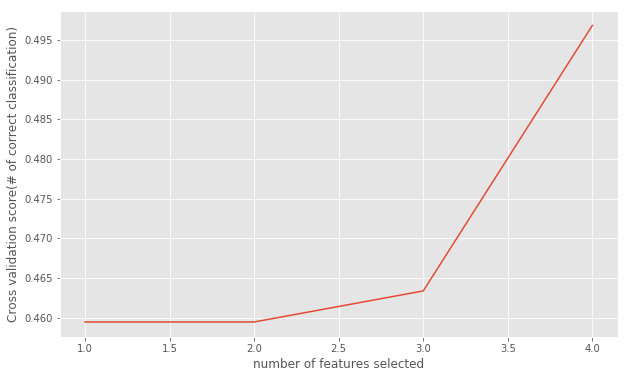

In [1266]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator = LogisticRegression(), step = 1, cv = 10, scoring = 'accuracy')
rfecv.fit(X,y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize = (10,6))
plt.xlabel("number of features selected")
plt.ylabel("Cross validation score(# of correct classification)")
plt.plot(range(1,len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

__Using RFE:__
We use RFE to see how many features we really needed. Then we see how important each feature is, and if it is relevant to the model. After conducting cross validation on RFE we were able to find the optimal number of features needed in our model. Looking at the plot, we see that having four features is the most optimal.

__K-Nearest Neighbors__

In [1255]:
from sklearn.cross_validation import train_test_split

# create design matrix X and target vector y
features = ['size(ft2)','price','Bedroom','Bathroom']
X = all_city[features]
y =all_city['location']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [1256]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.52


When using KNN the accuracy score is 52 percent.

In [1257]:
# subsetting just the odd ones
neighbors = list(range(1,50,2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


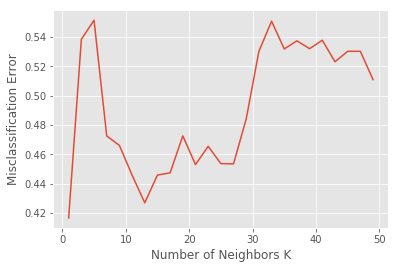

In [1258]:
MSE = [1 - x for x in cv_scores]
## determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


__Using KNN:__
The optimal number of neighbors is 1 so the closest neighbor is the best predictor.

After implementing RFE and KNN, we can see that the best way to approach this question on predicting the location would be using KNN (with only 1 neighbor) since it gives us a 52% accuracy which is the highest.

In [1270]:
#Sources 
#https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#exploring-knn-in-code
#http://blog.kaggle.com/2015/10/23/scikit-learn-video-9-better-evaluation-of-classification-models/
#https://github.com/justmarkham/scikit-learn-videos/blob/master/06_linear_regression.ipynb
#https://www.youtube.com/watch?v=85dtiMz9tSo
#http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
#https://www.dataquest.io/blog/machine-learning-python/
#https://github.com/unpingco/Python-for-Probability-Statistics-and-Machine-Learning/blob/master/chapters/machine_learning/notebooks/learning_theory.ipynb